In [34]:
from utils.load_results import *
from utils.plot_helpers import *

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('default')
import numpy as np
from scipy import stats

In [21]:
datasets = ['(3,4)', '(3,8)', '(3,16)', '(4,4)', '(4,8)', '(5,4)']
n_values = [4, 8, 16, 4, 8, 4]
n_attributes = [3, 3, 3, 4, 4, 5]
n_epochs = 300
n_datasets = len(datasets)
paths = ['results/' + d + '_game_size_10_vsf_3' for d in datasets]

## training

In [22]:
all_accuracies = load_accuracies_mu_and_goodman(paths, n_runs=5, n_epochs=300, val_steps=1, zero_shot=True)

## final accuracies 

In [23]:
all_accuracies = load_accuracies_mu_and_goodman(paths, n_runs=5, val_steps=1, zero_shot=True)
zero_shot_accs_specific = all_accuracies['zs_specific_test_acc']
zero_shot_accs_generic = all_accuracies['zs_generic_test_acc']

In [24]:
for i, dataset in enumerate(zero_shot_accs_specific):
    print(str(datasets[i]) + " (standard) Mean test accuracy over runs: " + str(round(dataset.mean(), 3)) + " (" + str(round(dataset.std(), 3)) + ")")

(3,4) (standard) Mean test accuracy over runs: 0.91 (0.014)
(3,8) (standard) Mean test accuracy over runs: 0.866 (0.033)
(3,16) (standard) Mean test accuracy over runs: 0.859 (0.015)
(4,4) (standard) Mean test accuracy over runs: 0.938 (0.005)
(4,8) (standard) Mean test accuracy over runs: 0.904 (0.005)
(5,4) (standard) Mean test accuracy over runs: 0.904 (0.024)


In [25]:
for i, dataset in enumerate(zero_shot_accs_generic):
    print(str(datasets[i]) + " (standard) Mean test accuracy over runs: " + str(round(dataset.mean(), 3)) + " (" + str(round(dataset.std(), 3)) + ")")

(3,4) (standard) Mean test accuracy over runs: 0.786 (0.043)
(3,8) (standard) Mean test accuracy over runs: 0.613 (0.029)
(3,16) (standard) Mean test accuracy over runs: 0.584 (0.016)
(4,4) (standard) Mean test accuracy over runs: 0.761 (0.032)
(4,8) (standard) Mean test accuracy over runs: 0.629 (0.027)
(5,4) (standard) Mean test accuracy over runs: 0.664 (0.048)


In [28]:
all_accuracies

{'zs_specific_test_acc': array([[0.90632826, 0.93364567, 0.91052085, 0.89164066, 0.90854174],
        [0.80299503, 0.86738938, 0.88574535, 0.89551437, 0.8804819 ],
        [0.85556   , 0.87199056, 0.87913328, 0.84200686, 0.84509075],
        [0.92992675, 0.94338876, 0.93536139, 0.93888676, 0.9412843 ],
        [0.90274781, 0.90523946, 0.90757322, 0.90976751, 0.8956753 ],
        [0.88196099, 0.8714444 , 0.91538274, 0.91611236, 0.93715042]]),
 'zs_generic_test_acc': array([[0.82875001, 0.71249998, 0.80541664, 0.76291662, 0.82083338],
        [0.63416666, 0.55895835, 0.62687486, 0.60979164, 0.63708335],
        [0.57645828, 0.61499995, 0.57854164, 0.56822914, 0.57999998],
        [0.76718748, 0.69906247, 0.78312498, 0.77125007, 0.78437507],
        [0.64874995, 0.57734376, 0.62984383, 0.63875002, 0.64968753],
        [0.60874999, 0.6415    , 0.69924998, 0.63350004, 0.73874998]])}

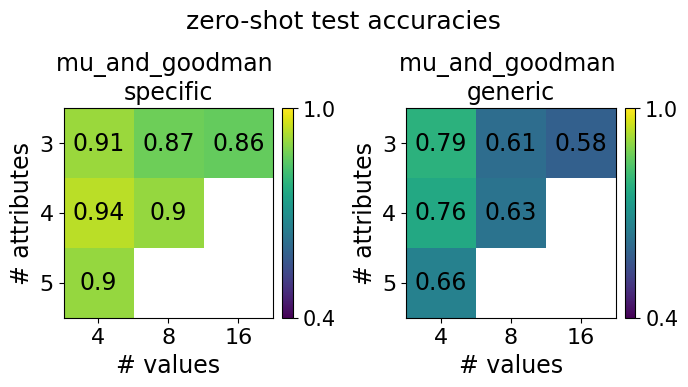

In [35]:
accuracies = [all_accuracies['zs_specific_test_acc'], all_accuracies['zs_generic_test_acc']]
plot_heatmap(accuracies, 'mean', plot_dims=(1,2), ylims=(0.4, 1.0), figsize=(7, 3.5), suptitle='zero-shot test accuracies', 
             titles=('mu_and_goodman \nspecific', 'mu_and_goodman \ngeneric'),
             fontsize=17)